In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as colors
import matplotlib.patches as mpatches

## Plotting preferences

In [2]:
# Font sizes
big_font = 25
medium_font = 20
small_font = 15

# Colours
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

## Data 

In [3]:
df = pd.read_csv('testdata.csv')

In [4]:
df

,Inj.0P alpha0,Inj.0P delta0,Inj.0P pmra,Inj.0P pmdec,Inj.0P prlx,Inj.1P alpha0,Inj.1P delta0,Inj.1P pmra,Inj.1P pmdec,Inj.1P prlx,...,npBIC,wpBIC,DeltaBIC,Condition1,Condition2,Condition3,Detection,Astrometric Signature,Noise,S/N
0,189.806322,-2.046369,25.873933,-105.464344,10.313439,189.806322,-2.046369,25.873933,-105.464344,10.313439,...,12.824432,42.588233,-29.763801,1,1,0,0,0.695626,140.432748,0.092736
1,146.282152,-76.422608,11.710320,-30.860298,13.251309,146.282152,-76.422608,11.710320,-30.860298,13.251309,...,12.873847,42.624096,-29.750249,1,1,0,0,2.182369,132.140983,0.240557
2,226.514554,60.604064,87.154756,-249.952004,23.442114,226.514554,60.604064,87.154756,-249.952004,23.442114,...,4.467388,42.612564,-38.145176,1,1,1,1,118.469709,112.249788,2.098797
3,219.744134,83.179855,-168.527105,-42.443551,21.989556,219.744134,83.179855,-168.527105,-42.443551,21.989556,...,3.633290,42.537660,-38.904369,1,1,1,1,459.838938,104.211645,3.738541
4,75.283202,-27.007187,14.678932,36.204359,10.496341,75.283202,-27.007187,14.678932,36.204359,10.496341,...,12.685303,42.663262,-29.977959,1,1,0,0,2.403189,204.846989,0.077163
5,140.924641,-65.947363,-32.662504,46.300430,11.710191,140.924641,-65.947363,-32.662504,46.300430,11.710191,...,12.064645,42.689703,-30.625057,1,1,0,0,9.589088,100.683322,1.509278
6,228.367689,-30.571842,-42.111935,-27.618370,11.180418,228.367689,-30.571842,-42.111935,-27.618370,11.180418,...,5.340541,42.682652,-37.342110,1,1,1,1,132.269553,133.148411,3.387868
7,332.710753,5.177977,71.718135,-88.219391,19.250300,332.710753,5.177977,71.718135,-88.219391,19.250300,...,12.737887,42.563755,-29.825868,1,1,0,0,1.272955,58.110926,0.373010
8,125.694483,-57.445902,-371.351961,480.734979,77.631726,125.694483,-57.445902,-371.351961,480.734979,77.631726,...,6.291648,42.667352,-36.375704,1,1,0,0,26.626064,49.579653,9.598753
9,262.414488,-78.768628,-51.176278,-100.005791,10.527307,262.414488,-78.768628,-51.176278,-100.005791,10.527307,...,12.544290,42.675397,-30.131107,1,1,0,0,7.809695,220.051210,0.183374


In [5]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition1', 'Condition2', 'Condition3',
       'Detection', 'Astrometric Signature', 'Noise', 'S/N'],
      dtype='object')

(-1.0, 1.0)

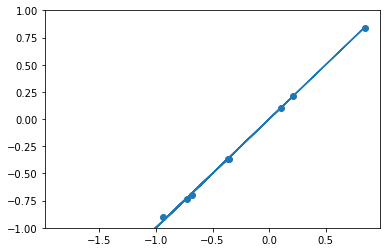

In [6]:
# if data type is correct
log_P_inj = df['Inj.1P log(P)']


# if data type needs to be corrected 
# log_P_inj = []

# for i in df['Inj.1P log(P)']:
#     log_P_inj.append(float(i[2:-2]))

# plot
plt.scatter(log_P_inj, df['Rec.1P log(P)'])
plt.plot(log_P_inj, log_P_inj)

plt.ylim(-1,1)

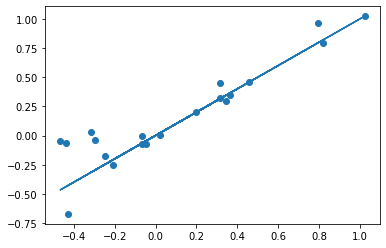

In [7]:
# if data type is correct
log_mp_inj = df['Inj.1P log(m_p)']


# if data type needs to be corrected 
# log_mp_inj = []

# for i in df['Inj.1P log(m_p)']:
#     log_mp_inj.append(float(i[2:-2]))

# plot
plt.scatter(log_mp_inj, df['Rec.1P log(m_p)'])
plt.plot(log_mp_inj, log_mp_inj)

# Bins 

### - Bins should be in units of years and $M_J$

In [8]:
num_Mbins = 15 
num_Pbins = 20 

Mbins = np.logspace(np.log10(0.3), np.log10(13), num_Mbins) 
Pbins = np.logspace(-2, 1, num_Pbins) 

In [9]:
mass_data = 10**df['Rec.1P log(m_p)'] # [M_J]
period_data = 10**df['Rec.1P log(P)'] # [years]

detection = df['Detection']
#detection = np.ones(N, dtype=int)

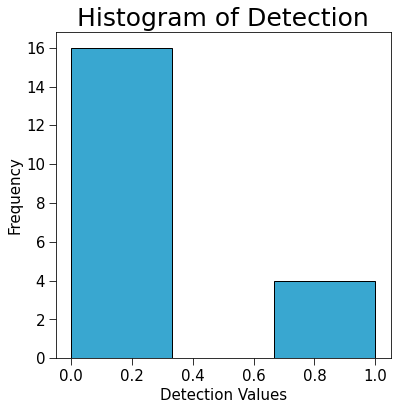

In [10]:
# Create a figure for the histogram
fig, ax = plt.subplots(figsize=(6, 6))  

# Plot histogram for detection data
ax.hist(detection, 
        bins=3, 
        color=my_colours[-3], 
        edgecolor='black')  # Adjust the number of bins as needed

# Titles and axes
ax.set_title('Histogram of Detection', fontsize=big_font)
ax.set_xlabel('Detection Values', fontsize=small_font)
ax.set_ylabel('Frequency', fontsize=small_font)

# Adjust ticks
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)
    
# Show the plot
plt.show()

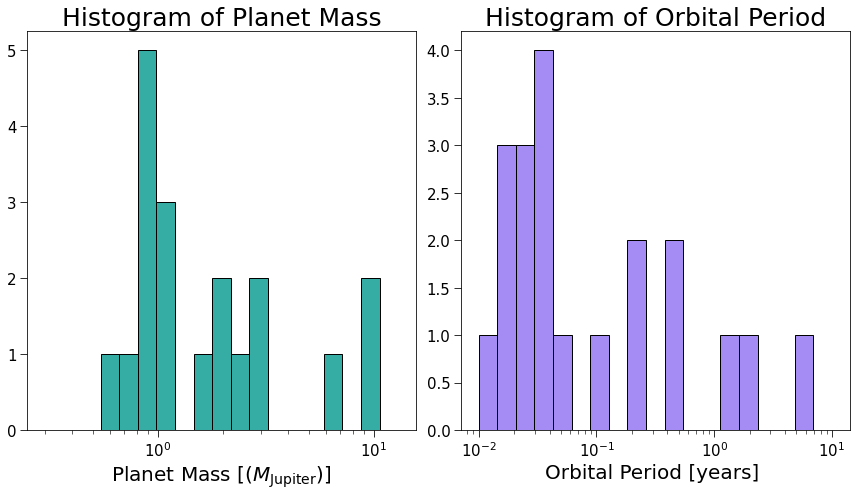

In [11]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(12,7))

# Plot histogram for m_planet
axs[0].hist(mass_data, # [M_J]
            bins=np.logspace(np.log10(0.3),np.log10(13), 20), 
            color=my_colours[-4], 
            edgecolor='black')

# Plot histogram for P
axs[1].hist(period_data, # [years]
            bins=np.logspace(-2, 1,20), 
            color=my_colours[-2], 
            edgecolor='black')


# Plot titles
axs[0].set_title('Histogram of Planet Mass', fontsize=big_font)
axs[1].set_title('Histogram of Orbital Period', fontsize=big_font)

# Axes scale 
axs[0].set_xscale('log')
axs[1].set_xscale('log')

# Axes labels 
axs[0].set_xlabel('Planet Mass [($M_{\mathrm{Jupiter}}$)]', fontsize=medium_font)
axs[1].set_xlabel('Orbital Period [years] ', fontsize=medium_font)

for i in range(2):
    axs[i].tick_params(labelsize=small_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Shape of the arrays 
x_shape = len(Pbins) - 1
y_shape = len(Mbins) - 1

# Making the arrays
num_planets_per_bin = np.zeros((x_shape, y_shape))
num_detected        = np.zeros((x_shape, y_shape))
sensitivity         = np.zeros((x_shape, y_shape))

for i,p in enumerate(Pbins[:-1]):
    for j,m in enumerate(Mbins[:-1]):
        # do mass and not log_mass
        mask = (mass_data >= Mbins[j]) & (mass_data < Mbins[j+1]) & (period_data >= Pbins[i]) & (period_data < Pbins[i+1])
        detected = mask & (detection == 1)
        num_planets_per_bin[i,j] = mask.sum()
        num_detected[i,j] = detected.sum()
        
        # add if statement, if == 0 , set negative (plot in different colour)
        if num_planets_per_bin[i,j] == 0:
            sensitivity[i,j] = -1
        else:
            sensitivity[i,j] = (num_detected[i,j] / num_planets_per_bin[i,j])*100

In [13]:
print('sensitivity min = ', sensitivity.min())
print('sensitivity max = ', sensitivity.max())

sensitivity min =  -1.0
sensitivity max =  100.0


In [14]:
empty_cells = np.where(sensitivity == -1, -1, np.nan)

# Plot 

### Axes
- x-axis: Period (years)
- y-axis: Mass ($M_J$)
- Axes should both me log 

### plot with plt.pcolormesh(period, mass, sensitivity.T)

### set to negative - set colour 

In [15]:
# normal cell cmap
cmap_sensitivity = 'Blues'


# empty cells colours 
cmap_empty_cells = plt.get_cmap('cool_r')
empty_cells_alpha = 0.1
empty_cell_colour = cmap_empty_cells(plt.Normalize(-1, 1)(-1))[:-1] + (empty_cells_alpha,)

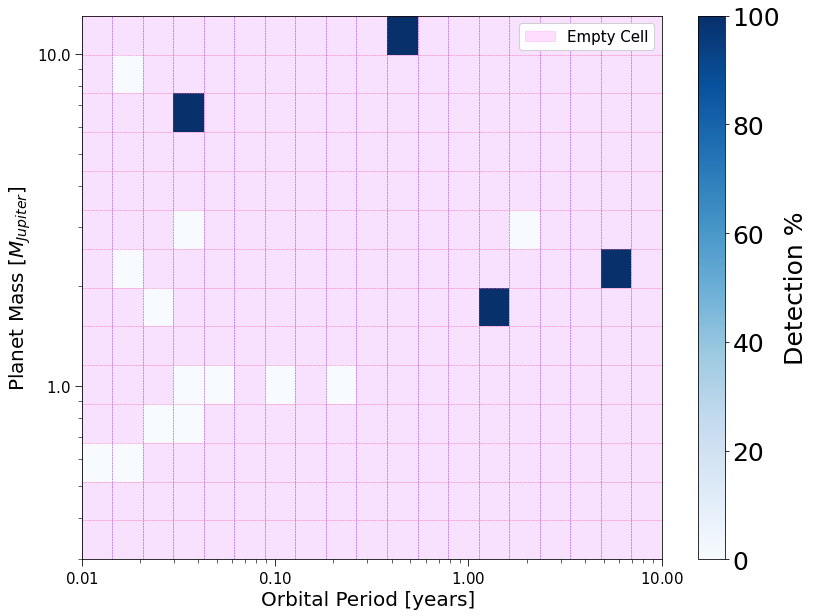

In [16]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

                

im = ax.pcolormesh(Pbins,
                   Mbins,
                   sensitivity.T,
                   cmap=cmap_sensitivity,
                   vmin=0,
                   vmax=100)

im_mask = ax.pcolormesh(Pbins,
                        Mbins,
                        empty_cells.T,
                        cmap=cmap_empty_cells,
                        vmin=0,
                        vmax=100,
                        alpha = empty_cells_alpha) 

# Color bar
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Detection %', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Plotting vertical lines
for p in Pbins:
    ax.axvline(x=p, color='blueviolet', linestyle='--', linewidth=0.5)

# Plotting horizontal lines
for m in Mbins:
    ax.axhline(y=m, color='hotpink', linestyle='--', linewidth=0.5)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Empty cell legend
empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)], 
                              labels=['Empty Cell'], 
                              loc='upper right', 
                              fontsize=small_font)
ax.add_artist(empty_cell_legend)

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

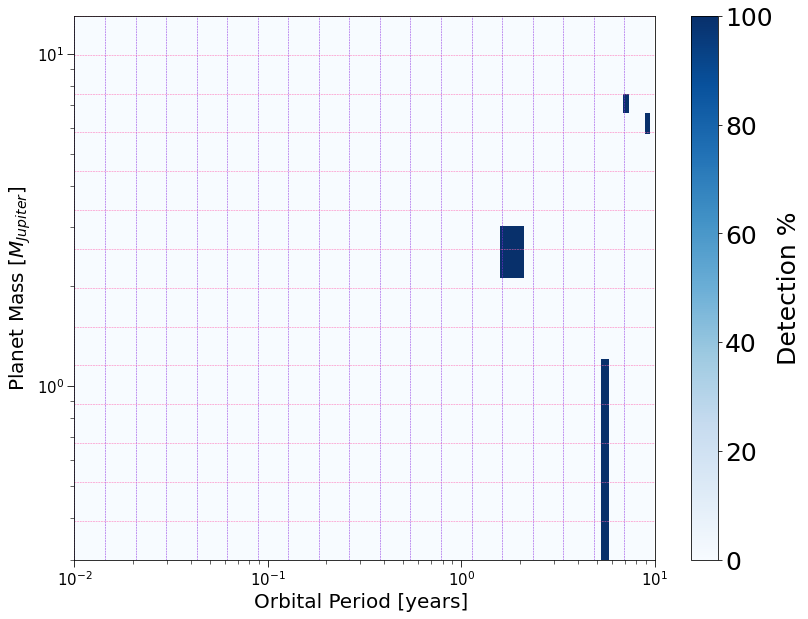

In [17]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

extent = Pbins[0], Pbins[-1], Mbins[0], Mbins[-1]

cmap = 'Blues'

# Plotting the masked array
masked_sensitivity = np.ma.masked_where(sensitivity == -1, sensitivity)
im_masked = plt.imshow(masked_sensitivity.T, 
                       extent=extent, 
                       aspect='auto', 
                       cmap='spring',  
                       vmin=0, 
                       vmax=100,
                       interpolation='none',
                       origin="upper",
                       alpha=1)


im = plt.imshow(sensitivity.T, 
                extent=extent, 
                aspect='auto', 
                cmap=cmap,
                vmin=0, 
                vmax=100,
                interpolation='none',
                origin="upper")#,
                #alpha=1)


cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Detection %', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)


# axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Plotting vertical lines
for p in Pbins:
    ax.axvline(x=p, color='blueviolet', linestyle='--', linewidth=0.5)

# Plotting horizontal lines
for m in Mbins:
    ax.axhline(y=m, color='hotpink', linestyle='--', linewidth=0.5)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()